In [1]:
from shared import *
purchases_df = get_wearable_purchases_df()
wearable_types_df = get_wearable_types_df()
purchases_types_df = get_wearables_purchases_types_df(wearable_types_df, purchases_df)

In [2]:
column_name_mappings = {'name': 'Wearable', 'quantity': 'Total Volume (Units)', 'totalPrice': 'Total Volume (GHST)', 'rarity': 'Rarity', 'slotNames': 'Slot(s)', 'datePurchased': 'Date', 'startOfWeekPurchased': 'Week', 'yearMonthPurchased': 'Month'}
metrics = [column_name_mappings['quantity'], column_name_mappings['totalPrice']]

def get_volume_by_column(column_name):
    return purchases_types_df.pivot_table(index=column_name,values=['quantity', 'totalPrice'],aggfunc=np.sum,margins=False).reset_index().rename(columns=column_name_mappings)

## Wearable Sales Volume

Based on sales of wearables on the [Aavegotch Baazaar](https://wiki.aavegotchi.com/en/baazaar) during the report dates. Aavegotchi DAO earns 1.5% share of all baazaar sales.

In [3]:
total_volume_df = pd.DataFrame([[purchases_types_df['quantity'].sum(), purchases_types_df['totalPrice'].sum()]], columns=['Total Volume (Units)', 'Total Volume (GHST)'])
show_itable(total_volume_df)

In [4]:
volume_by_week = get_volume_by_column('startOfWeekPurchased')
volume_by_month = get_volume_by_column('yearMonthPurchased')

### Volume by Week
Date shown are the start date of each week.

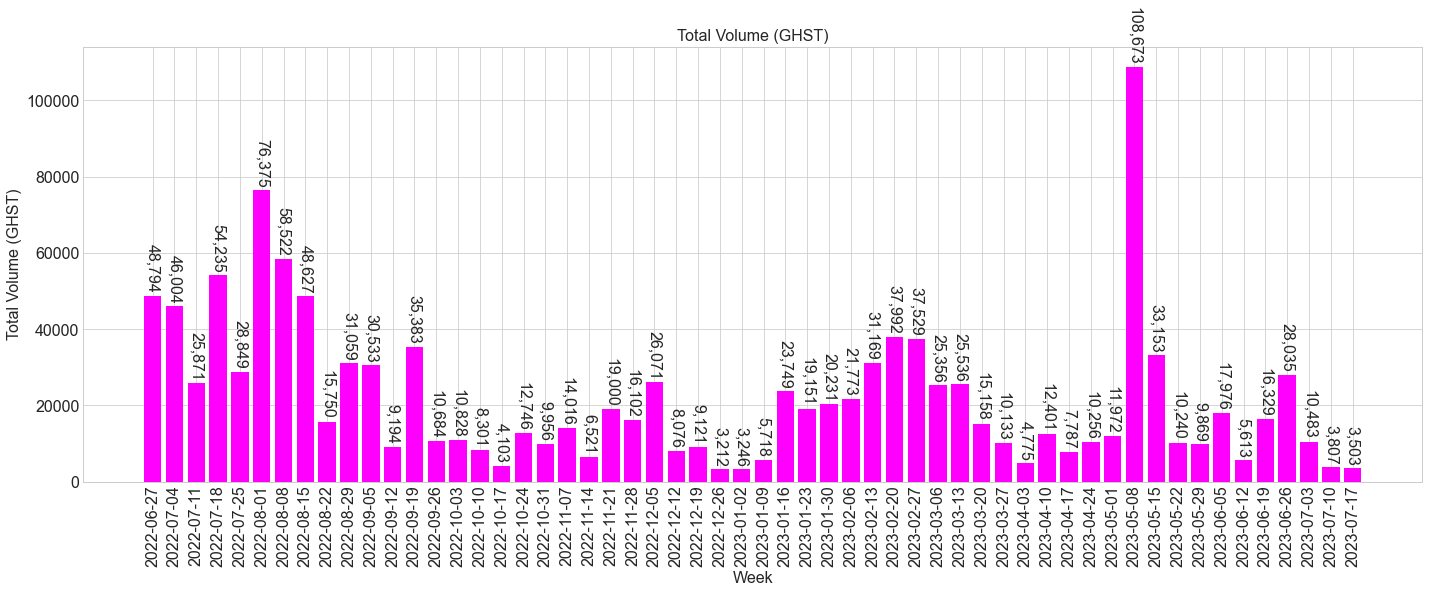

In [5]:
fig, ax = get_bar_charts(volume_by_week.reset_index(), 'Week', ['Total Volume (GHST)'], [GHST_COLOR], annotate_rotation=-90)
ax.tick_params(axis='x', labelrotation=90)
plt.show()

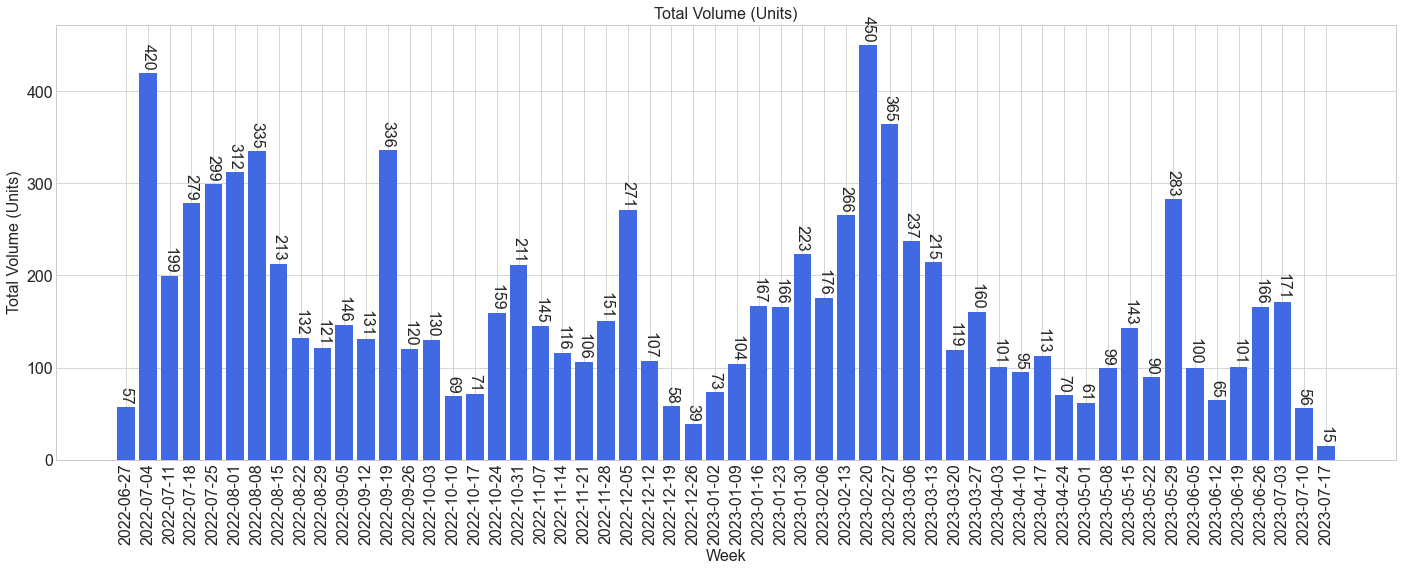

In [6]:
fig, ax = get_bar_charts(volume_by_week.reset_index(), 'Week', ['Total Volume (Units)'], ['royalBlue'], annotate_rotation=-90)
ax.tick_params(axis='x', labelrotation=90)
plt.show()

### Volume by Month

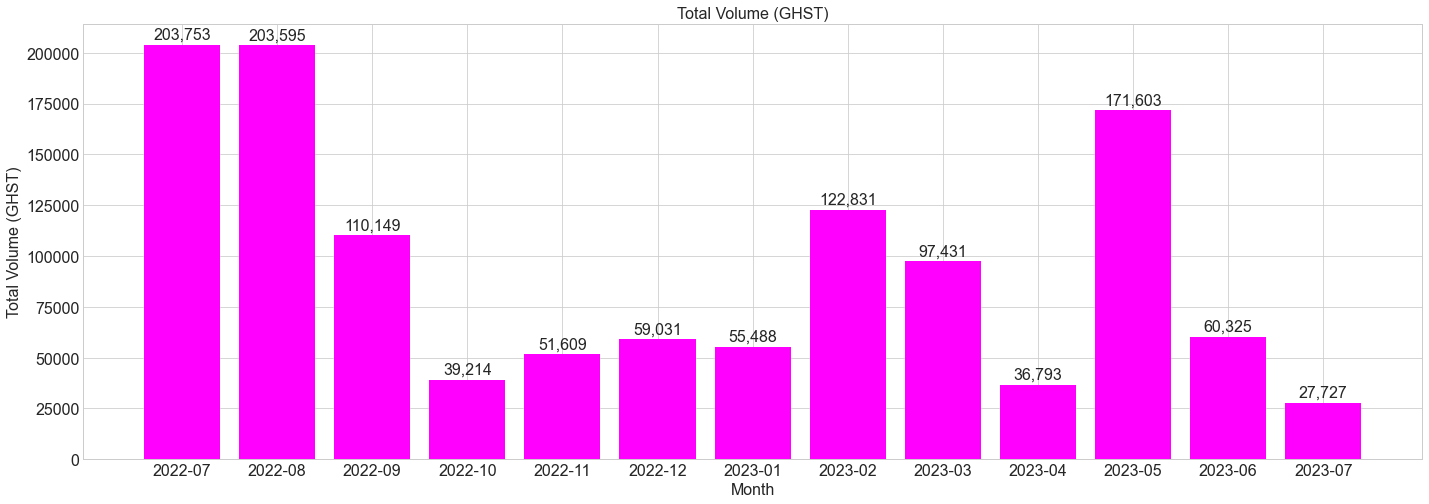

In [7]:
fig, ax = get_bar_charts(volume_by_month.reset_index(), 'Month', ['Total Volume (GHST)'], [GHST_COLOR])
ax.tick_params(axis='x')
plt.show()

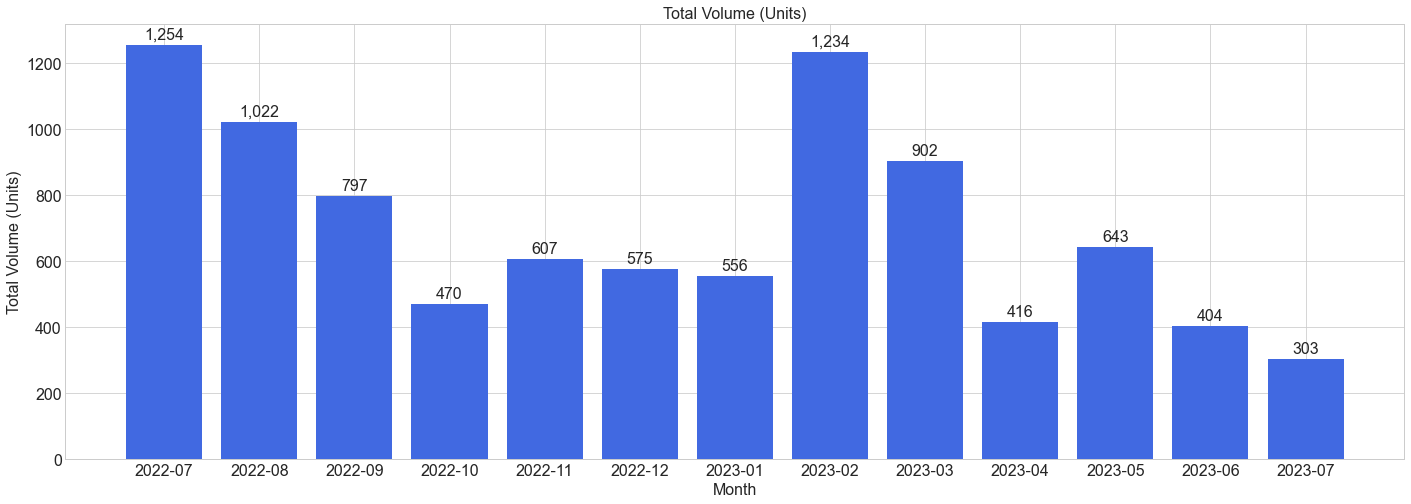

In [8]:
fig, ax = get_bar_charts(volume_by_month.reset_index(), 'Month', ['Total Volume (Units)'], ['royalBlue'])
ax.tick_params(axis='x')
plt.show()

### Volume by Wearable
Wearables that have not had sales in the reporting period are omitted.

In [9]:
by_name_df = get_volume_by_column('name')
show_itable_long(by_name_df, order=[[2, 'desc']])

### Volume by Slot

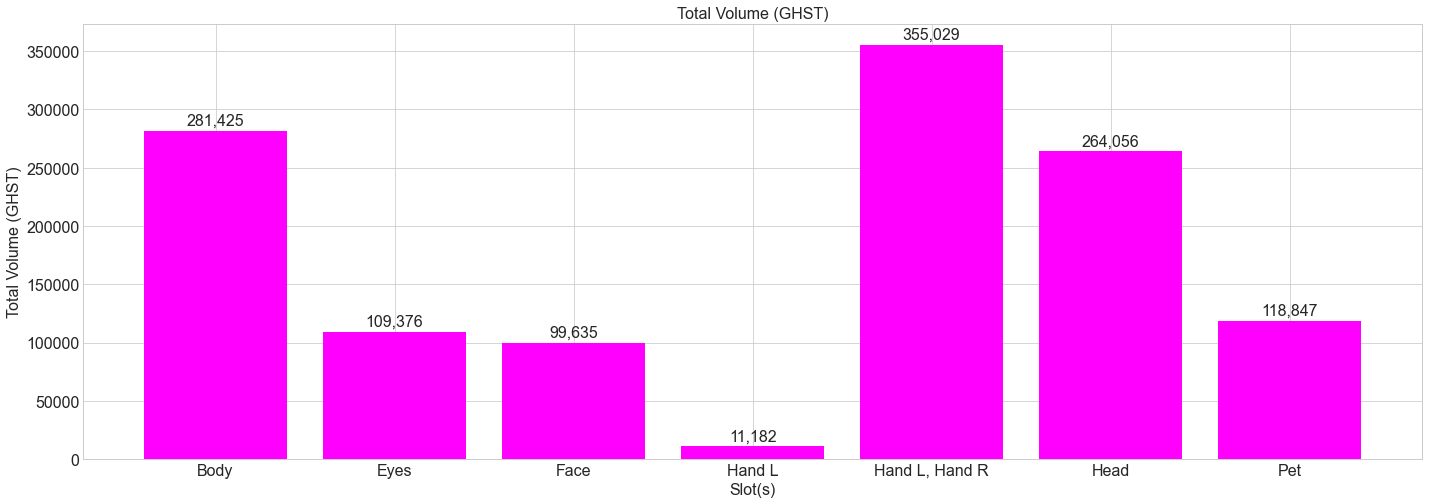

In [10]:
by_slot_df = get_volume_by_column('slotNames')
fig, ax = get_bar_charts(by_slot_df, column_name_mappings['slotNames'], ['Total Volume (GHST)'], [GHST_COLOR])

### Volume by Rarity

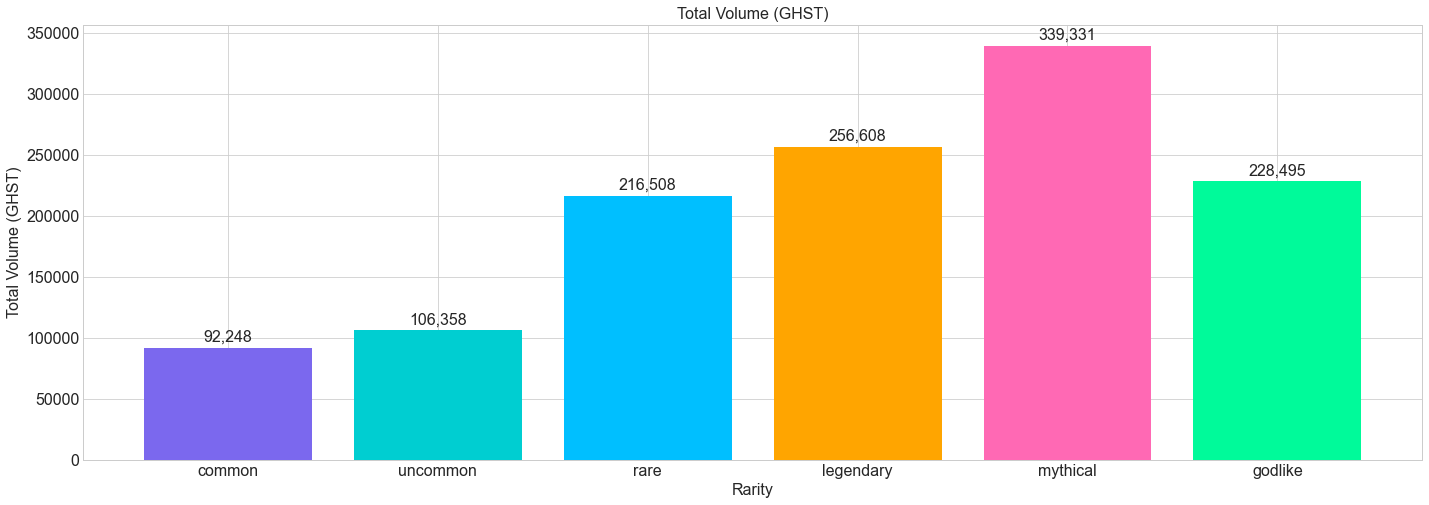

In [11]:
by_rarity_df = get_volume_by_column('rarity')
sorted_by_rarity_df = by_rarity_df.sort_values(column_name_mappings['quantity'], ascending=False)
rarity_colors = list(map(get_rarity_color, sorted_by_rarity_df[column_name_mappings['rarity']].to_list()))
fig, ax = get_bar_charts(sorted_by_rarity_df, column_name_mappings['rarity'], metrics[1:], [rarity_colors])